# **Project: Text Classification**
+ build a text classification model on song lyrics. This model will predict the artist from a piece of text. The used input data will be web scraped from a lyrics web page
+ In this project the Spanish artists 'Maluma' and 'Ozuna' were taken

# **Imports**

In [323]:
import requests
import re
import pandas as pd
import numpy as np
import seaborn as sns
import os
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import wordcloud

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import  MultinomialNB

import nltk
from nltk.corpus import stopwords
from nltk.data import load


# **Find song links of the artist 'Maluma'**

### Save song list in a text file

In [2]:
# Open page with a list of Camilos songs
page = requests.get('https://www.lyrics.com/artist/Maluma/2669415')
# get the status of the page
print(page.status_code,'\n')

200 



In [3]:
#Safe the content of the songoverview in a text file
file = open("Maluma.txt", "w")
file.write(page.text)
file.close()

In [9]:
file = open("Maluma.txt", "r")
text_read= file.read()
file.close()

### Find song links with Regex

In [10]:
pattern = 'href=".l(.*?)"'
results = re.findall(pattern,text_read)

In [11]:
links_addition = [i.replace('yric','https://www.lyrics.com//lyric').replace('"','') for i in results]

In [12]:
links_addition

['https://www.lyrics.com//lyric/36233904/Maluma/11+PM',
 'https://www.lyrics.com//lyric/36233903/Maluma/HP',
 'https://www.lyrics.com//lyric/36233902/Maluma/No+Se+Me+Quita',
 'https://www.lyrics.com//lyric/36233901/Maluma/Dispuesto',
 'https://www.lyrics.com//lyric/36233900/Maluma/No+Puedo+Olvidarte',
 'https://www.lyrics.com//lyric/36233899/Maluma/Me+Enamor%C3%A9+de+Ti',
 'https://www.lyrics.com//lyric/36233898/Maluma/Extra%C3%B1%C3%A1ndote',
 'https://www.lyrics.com//lyric/36233897/Maluma/Shhh+%28Calla%27%29',
 'https://www.lyrics.com//lyric/36233896/Maluma/Dinero+Tiene+Cualquiera',
 'https://www.lyrics.com//lyric/36233895/Maluma/Soltera',
 'https://www.lyrics.com//lyric/36233894/Maluma/Te+Quiero',
 'https://www.lyrics.com//lyric/36233893/Maluma/Instinto+Natural',
 'https://www.lyrics.com//lyric/36233891/Maluma/La+Flaca',
 'https://www.lyrics.com//lyric/36233890/Maluma/Puesto+Pa%27+Ti',
 'https://www.lyrics.com//lyric/36233889/Maluma/D%C3%A9jale+Saber',
 'https://www.lyrics.com//lyri

### Create a text file with the song links

In [8]:
text_links = open("Maluma_links.txt", "w")
for element in links_addition:
    text_links.write(element+"\n")
text_links.close()

# **Find song links of the artist 'Ozuna'**

### Save song list in a text file

In [9]:
# Open page with a list of ROSALÍAs songs
page = requests.get('https://www.lyrics.com/artist/Ozuna/3228162')
# get the status of the page
print(page.status_code,'\n')

200 



In [10]:
#Safe the content of the songoverview in a text file
file_rosa = open("Ozuna.txt", "w")
file_rosa.write(page.text)
file_rosa.close()

In [5]:
file = open("Ozuna.txt", "r")
text_read_rosa= file.read()
file.close()

### Find song links with Regex

In [6]:
pattern_rosa = 'href=".l(.*?)"'
results_rosa = re.findall(pattern_rosa,text_read_rosa)

In [7]:
links_addition_rosa = [i.replace('yric','https://www.lyrics.com//lyric').replace('"','') for i in results_rosa]

In [8]:
links_addition_rosa

['https://www.lyrics.com//lyric/36233901/Ozuna/Dispuesto',
 'https://www.lyrics.com//lyric/36498704/Ozuna/Esclavo+de+Tus+Besos',
 'https://www.lyrics.com//lyric/36502716/Ozuna/Adicto+%5Bwith+Anuel+AA+%26+Ozuna%5D',
 'https://www.lyrics.com//lyric/36398206/Ozuna/Amor+Genuino',
 'https://www.lyrics.com//lyric/36206170/Ozuna/Baila+Baila+Baila',
 'https://www.lyrics.com//lyric/36466924/Ozuna/China',
 'https://www.lyrics.com//lyric/36473112/Ozuna/Do+It+When+I%27m+in+It',
 'https://www.lyrics.com//lyric/36614486/Ozuna/Casualidad',
 'https://www.lyrics.com//lyric/35944231/Ozuna/Imposible',
 'https://www.lyrics.com//lyric/36634758/Ozuna/Aventura',
 'https://www.lyrics.com//lyric/34949102/Ozuna/Ahora+Dice',
 'https://www.lyrics.com//lyric/35390116/Ozuna/Aura',
 'https://www.lyrics.com//lyric/35390115/Ozuna/Me+Dijeron',
 'https://www.lyrics.com//lyric/35390114/Ozuna/Vaina+Loca',
 'https://www.lyrics.com//lyric/35390113/Ozuna/Devu%C3%A9lveme',
 'https://www.lyrics.com//lyric/35390112/Ozuna/Quiero

In [15]:
text_links_rosa = open("Ozuna_links.txt", "w")
for element in links_addition_rosa:
    text_links_rosa.write(element+"\n")
text_links_rosa.close()

# **Create folders and text documents for the lyrics**

### Generate names of the songs for the creation of the folders for Maluma

In [13]:
#extract and clean up names from links list
song_names_raw = []
for element in links_addition:
    name = element [46:]
    song_names_raw.append(name)
song_names = [i.replace('+',' ').replace('%2A','*').replace('%2C',',').replace('%5B','[').replace('%5D',']').replace('%C2%BF','¿').replace('%3F','?').replace('%C3%A3','ã').replace('%29',')').replace('%C3%B1','ñ').replace('%28','(').replace('%27','').replace('%C3%A9','é').replace('%C3%A1','á').replace('%C3%B1e','ñ').replace('i%2C','í').replace('%C3%B3','ó').replace('%C3%BA','ú').replace('%C3%AD','í').replace('%5BRemix%5D', '[Remix]') for i in song_names_raw]
# remove duplicates
song_names = list(dict.fromkeys(song_names))
song_names

['11 PM',
 'HP',
 'No Se Me Quita',
 'Dispuesto',
 'No Puedo Olvidarte',
 'Me Enamoré de Ti',
 'Extrañándote',
 'Shhh (Calla)',
 'Dinero Tiene Cualquiera',
 'Soltera',
 'Te Quiero',
 'Instinto Natural',
 'La Flaca',
 'Puesto Pa Ti',
 'Déjale Saber',
 'Amigos con Derechos',
 'Fresh Kerias',
 'Latina',
 'Medellín',
 'Bitch Im Loca',
 'Créeme',
 'Que Más Pues',
 'Bandida',
 'Felices los 4',
 'Arms Around You',
 'F.A.M.E. (Intro)',
 'Corazón',
 'El Préstamo',
 'Cuenta a Saldo',
 'Hangover',
 'Mi Declaración',
 'How I Like It',
 'Marinero',
 'Delincuente',
 'Condena',
 'Ojos Que No Ven',
 'La Ex',
 'Unfollow',
 'La Luz',
 'Todo El Amor',
 'Felices Los 4',
 'Hola',
 'Sólo Mía',
 'Vente Pa Ca',
 'Chantaje',
 'Trap',
 'Desde Esa Noche',
 'Tengo un Amor',
 'Believer',
 'Borro cassette',
 'Aire',
 'Cuatro Babys',
 'El Perdedor',
 'La Fila',
 'Que Sí, Que No',
 'Borro Cassette',
 'Cuánto Me Duele',
 'Salgamos',
 'Sim ou não',
 '¿Dónde Estás?',
 'Me Gustas',
 'Sin Contrato',
 'Una Aventura',
 'Pre

### Creation of folders and and text files of lyrics for Maluma

In [556]:
#create a loop for folders and insert text (in .txt) from website inside it
def folder_and_lyrics_creation(artist,list_songname,list_links):
    """ This function creates a folder for each song of an artist and puts a textfile of the songlyrics inside
    
    Parameters:
    -----------------
    Name of the artist in '' (e.g. 'Maluma')
    A list of all the song names
    A list of all the links to the corresponding song lyrics
    
    Returns: 
    -----------------
    [None] A created subfolder with the name of the artist and further subfolders inside with the various songs
    """
    count = range(len(list_songname))
    for i in count:
        try:
            root_path = '{artist}'
            os.makedirs(os.path.join(root_path,songname[i]))
        except:
            print('folder "'+list_songname[i]+'" already exists')
        page = requests.get(list_links[i])
        #use the beautiful soup to generate the lyrics    
        artist_html = page.text
        artist_soup = BeautifulSoup(artist_html, 'html.parser')
        song_content = artist_soup.find_all('pre', attrs = {'id' : 'lyric-body-text', } )[0].text.replace('\n',' ')
    
        filepath = artist+'/{}'.format(list_songname[i])
        filename = filepath+'/{}.txt'.format(list_songname[i])
    
        song_file = open(filename, "w")
        song_file.write(song_content)
        song_file.close()

In [554]:
folder_and_lyrics_creation('Maluma',song_names,links_addition)

folder "11 PM" already exists
folder "HP" already exists
folder "No Se Me Quita" already exists
folder "Dispuesto" already exists
folder "No Puedo Olvidarte" already exists
folder "Me Enamoré de Ti" already exists
folder "Extrañándote" already exists
folder "Shhh (Calla)" already exists
folder "Dinero Tiene Cualquiera" already exists
folder "Soltera" already exists
folder "Te Quiero" already exists
folder "Instinto Natural" already exists


KeyboardInterrupt: 

### Generate names of the songs for the creation of the folders for Ozuna

In [14]:
links_addition_rosa

['https://www.lyrics.com//lyric/36233901/Ozuna/Dispuesto',
 'https://www.lyrics.com//lyric/36498704/Ozuna/Esclavo+de+Tus+Besos',
 'https://www.lyrics.com//lyric/36502716/Ozuna/Adicto+%5Bwith+Anuel+AA+%26+Ozuna%5D',
 'https://www.lyrics.com//lyric/36398206/Ozuna/Amor+Genuino',
 'https://www.lyrics.com//lyric/36206170/Ozuna/Baila+Baila+Baila',
 'https://www.lyrics.com//lyric/36466924/Ozuna/China',
 'https://www.lyrics.com//lyric/36473112/Ozuna/Do+It+When+I%27m+in+It',
 'https://www.lyrics.com//lyric/36614486/Ozuna/Casualidad',
 'https://www.lyrics.com//lyric/35944231/Ozuna/Imposible',
 'https://www.lyrics.com//lyric/36634758/Ozuna/Aventura',
 'https://www.lyrics.com//lyric/34949102/Ozuna/Ahora+Dice',
 'https://www.lyrics.com//lyric/35390116/Ozuna/Aura',
 'https://www.lyrics.com//lyric/35390115/Ozuna/Me+Dijeron',
 'https://www.lyrics.com//lyric/35390114/Ozuna/Vaina+Loca',
 'https://www.lyrics.com//lyric/35390113/Ozuna/Devu%C3%A9lveme',
 'https://www.lyrics.com//lyric/35390112/Ozuna/Quiero

In [16]:
#extract and clean up names from links list
song_names_raw_rosa = []
for element in links_addition_rosa:
    name = element [45:]
    song_names_raw_rosa.append(name)
song_names_rosa = [i.replace('+',' ').replace('%C3%81','Á').replace('%C3%9A','Ú').replace('%26','&').replace('%2A','*').replace('%2C',',').replace('%5B','[').replace('%5D',']').replace('%C2%BF','¿').replace('%3F','?').replace('%C3%A3','ã').replace('%29',')').replace('%C3%B1','ñ').replace('%28','(').replace('%27','').replace('%C3%A9','é').replace('%C3%A1','á').replace('%C3%B1e','ñ').replace('i%2C','í').replace('%C3%B3','ó').replace('%C3%BA','ú').replace('%C3%AD','í').replace('%5BRemix%5D', '[Remix]') for i in song_names_raw_rosa]
# remove duplicates
song_names_rosa = list(dict.fromkeys(song_names_rosa))
song_names_rosa

['Dispuesto',
 'Esclavo de Tus Besos',
 'Adicto [with Anuel AA & Ozuna]',
 'Amor Genuino',
 'Baila Baila Baila',
 'China',
 'Do It When Im in It',
 'Casualidad',
 'Imposible',
 'Aventura',
 'Ahora Dice',
 'Aura',
 'Me Dijeron',
 'Vaina Loca',
 'Devuélveme',
 'Quiero Más',
 'Tu Olor',
 'Ibiza',
 'Escape',
 'Pasado y Presente',
 'Aunque Me Porte Mal',
 'Sígueme los Pasos',
 'Hola',
 'Coméntale',
 'Única',
 'Haciéndolo',
 'La Modelo',
 'Supuestamente',
 'Monotonía',
 'Besos Mojados',
 'Que Va',
 'Callao',
 'Me Niego',
 'La Formula',
 'Brindemos',
 'Scared of the Dark',
 'Taki Taki',
 'No Quiero Amores',
 'Bebe',
 'La Rompe Corazones',
 'Bonita',
 'Yo Soy Yo',
 'Criminal',
 'Hello',
 'El Farsante',
 'Escápate Conmigo',
 'Sobredosis',
 'Odisea',
 'Tu Foto',
 'Se Preparó',
 'Cumpleaños',
 'Dile Que Tu Me Quieres',
 'Egoísta',
 'Una Flor',
 'Quiero Repetir',
 'Noches de Aventura',
 'Pide Lo Que Tú Quieras',
 'Síguelo Bailando',
 'Bebé',
 'No Quiere Enamorarse',
 'Carita de Ángel',
 'Si No Te 

In [555]:
folder_and_lyrics_creation('Ozuna',song_names_rosa,links_addition_rosa)

folder "Dispuesto" already exists
folder "Esclavo de Tus Besos" already exists


KeyboardInterrupt: 

# **Create a text corpus of all the songs**

In [324]:
docs = []
count = range(len(song_names))
for i in count:
    
    filepath = 'Maluma/{}'.format(song_names[i])
    filename = filepath+'/{}.txt'.format(song_names[i])
    song_file = open(filename, "r")
    lyrics= song_file.read()
    docs.append(lyrics)

count_rosa = range(len(song_names_rosa))
for i in count_rosa:
    
    filepath = 'Ozuna/{}'.format(song_names_rosa[i])
    filename = filepath+'/{}.txt'.format(song_names_rosa[i])
    song_file = open(filename, "r")
    lyrics= song_file.read()
    docs.append(lyrics)

In [325]:
#Doc file with all lyrics
len(docs), len(song_names), len(song_names_rosa)

(285, 137, 148)

### Clean the generate doc file

In [326]:
cleaned_doc_filtered = []
pattern = r"[^a-z-A-Z0-9áéíóúñüÁÉÍÓÚÜÑ]"
for doc in docs:
    print(doc)
    cleaned_doc = re.sub(pattern,' ',doc.lower())
    cleaned_doc_filtered.append(cleaned_doc)

Once de la noche, todavía no contesta Una 'e la mañana todavía y no hay respuesta Dos de la mañana me dice que está dispuesta Tres de la mañana y yo te tengo una propuesta  Cómo hacerte entender Que conmigo tú te ves mejor Que en mi carro tú te ves mejor El cuarto huele a Christian Dior Eres muy bonita pa' llorar por él No merece que seas fiel Ni tampoco tu piel  Bebé, cómo hacerte entender Que conmigo tú te ves mejor Que en mi carro tú te ves mejor El cuarto huele a Christian Dior Eres muy bonita pa' llorar por él No merece que seas fiel Ni tampoco tu piel  Él no va a extrañarte Tampoco va a pensarte Dice que está ocupado en cosas más importantes La nube que no deja ver el sol brillante No lo dejes que te apague, yeh eh No lo dejes que te apague  Cómo hacerte entender Que conmigo tú te ves mejor Que en mi carro tú te ves mejor El cuarto huele a Christian Dior Eres muy bonita pa' llorar por él No merece que seas fiel Ni tampoco tu piel Oh, oh, oh  Once de la noche, todavía no contesta 

In [327]:
number_words =[]

for item in cleaned_doc_filtered:
    number_words.append(len(item.split()))

In [328]:
maluma = 0
for i in range(137):
 maluma_words = number_words[i]
 maluma = maluma + maluma_words

In [329]:
ozuna = 0
for i in range(138,285):
 ozuna_words = number_words[i]
 ozuna = ozuna + ozuna_words

In [330]:
maluma, ozuna

(57453, 71583)

# **Filter text corpus - vectorize and implement stop words**

In [331]:
#Download stopwords for "Spanish" if needed
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [332]:
spanish_stopwords = stopwords.words('spanish')

In [333]:
#vectorize, removing stopwords and transform text into lowercase
cv = CountVectorizer(stop_words= spanish_stopwords, lowercase = True,)
vectorized_corpus = cv.fit_transform(cleaned_doc_filtered)

cv.get_stop_words()

cv.vocabulary_

In [334]:
# Instantiate TfidfTransformer()
tfidf=TfidfTransformer()

# Fit tfidf_trans
tfidf_matr=tfidf.fit_transform(vectorized_corpus)


# print idf values (just to show you the idf term
idf_df = pd.DataFrame(tfidf.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
idf_df.sort_values(by=['idf_weights'])

,idf_weights
si,1.192160
baby,1.262364
quiero,1.463035
pa,1.479842
sé,1.658780
...,...
handed,5.962845
happy,5.962845
harm,5.962845
guisito,5.962845


In [335]:
tfidf_df = pd.DataFrame(tfidf_matr.todense(),columns=cv.get_feature_names())

In [336]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': ['de',
  'la',
  'que',
  'el',
  'en',
  'y',
  'a',
  'los',
  'del',
  'se',
  'las',
  'por',
  'un',
  'para',
  'con',
  'no',
  'una',
  'su',
  'al',
  'lo',
  'como',
  'más',
  'pero',
  'sus',
  'le',
  'ya',
  'o',
  'este',
  'sí',
  'porque',
  'esta',
  'entre',
  'cuando',
  'muy',
  'sin',
  'sobre',
  'también',
  'me',
  'hasta',
  'hay',
  'donde',
  'quien',
  'desde',
  'todo',
  'nos',
  'durante',
  'todos',
  'uno',
  'les',
  'ni',
  'contra',
  'otros',
  'ese',
  'eso',
  'ante',
  'ellos',
  'e',
  'esto',
  'mí',
  'antes',
  'algunos',
  'qué',
  'unos',
  'yo',
  'otro',
  'otras',
  'otra',
  'él',
  'tanto',
  'esa',
  'estos',
  'mucho',
  'quienes',
  'nada',
  'muchos',
  'cual',
  'poco

# Build a classifiation model

In [337]:
# Function to evaluate the models
def print_evaluations(ytrue, ypred, model):
    """ This function calculates the scores: accuracy, precision, recall and f1. Shows the confusion matrix
    
    Parameters:
    -----------------
    ytrue: actual values for y
    ypred: predicted values for y
    model: Type of regression model
    
    Returns: 
    -----------------
    [None] results of the scores in a printed form and illustrated in a confusion matrix
    """
    
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    
    #print confusion matrix
    fig = plt.figure(figsize=(6, 6))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)
    
    #plot the heatmap
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Maluma', 'Ozuna']); 
    ax.yaxis.set_ticklabels(['Maluma', 'Ozuna'])
    
    return 

In [338]:
def get_scores(ytrue, ypred):
    """ This function calculates the scores: accuracy, precision, recall and f1
    Parameters:
    -----------------
    ytrue: actual values for y
    ypred: predicted values for y
    
    Returns: 
    -----------------
    Values of the scores in a list
    """
    return round(accuracy_score(ytrue, ypred), 3), round(precision_score(ytrue, ypred), 3), round(recall_score(ytrue, ypred), 3), round(f1_score(ytrue, ypred), 3)

In [339]:
X = pd.DataFrame(tfidf_df.values)

y_non_hot  = pd.DataFrame(['Maluma']*len(song_names) + ['Ozuna']*len(song_names_rosa))[0].rename('Artist')
y = y_non_hot.map({'Maluma':0,'Ozuna':1})

### train test split

In [340]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.20,random_state=120,stratify=y)

### Use Oversampling to match the number of lyrics

In [341]:
ros = RandomOverSampler(random_state=10) 
Xtrain_ros, ytrain_ros = ros.fit_resample(Xtrain, ytrain)

sm = SMOTE(random_state=10)
Xtrain_smote, ytrain_smote = sm.fit_resample(Xtrain, ytrain)

### Use Undersampling to match the number of lyrics

In [342]:
rus = RandomUnderSampler(random_state=10)
Xtrain_rus, ytrain_rus = rus.fit_resample(Xtrain, ytrain)

nm = NearMiss()
Xtrain_nm, ytrain_nm = nm.fit_resample(Xtrain, ytrain)

# Train Model with logistic regression

In [343]:
m = LogisticRegression()

### Logistic Regression

How does model LogisticRegression() score:
The accuracy of the model is: 0.877
The precision of the model is: 0.897
The recall of the model is: 0.867
The f1-score of the model is: 0.881
[[24  3]
 [ 4 26]]


' train: 0.990909090909091, test: 0.8771929824561403'

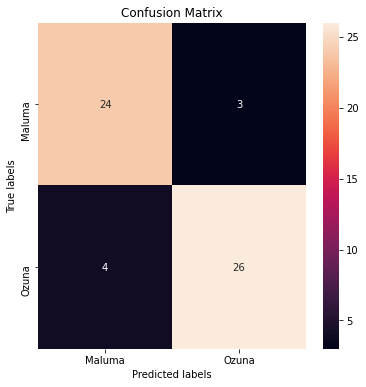

In [344]:
m.fit(Xtrain,ytrain)
ypred_test_m = m.predict(Xtest)
print_evaluations(ytest, ypred_test_m, m)
f' train: {m.score(Xtrain_nm,ytrain_nm)}, test: {m.score(Xtest,ytest)}'

### Near Miss

How does model LogisticRegression() score:
The accuracy of the model is: 0.842
The precision of the model is: 0.92
The recall of the model is: 0.767
The f1-score of the model is: 0.836
[[25  2]
 [ 7 23]]


' train: 0.9863636363636363, test: 0.8421052631578947'

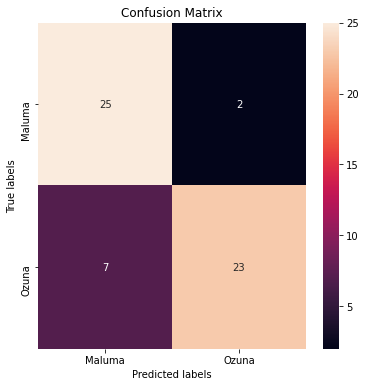

In [345]:
m.fit(Xtrain_nm,ytrain_nm)
ypred_test_m_nm = m.predict(Xtest)
print_evaluations(ytest, ypred_test_m_nm, m)
f' train: {m.score(Xtrain_nm,ytrain_nm)}, test: {m.score(Xtest,ytest)}'

### Random Under Sampling

How does model LogisticRegression() score:
The accuracy of the model is: 0.877
The precision of the model is: 0.926
The recall of the model is: 0.833
The f1-score of the model is: 0.877
[[25  2]
 [ 5 25]]


' train: 0.9863636363636363, test: 0.8771929824561403'

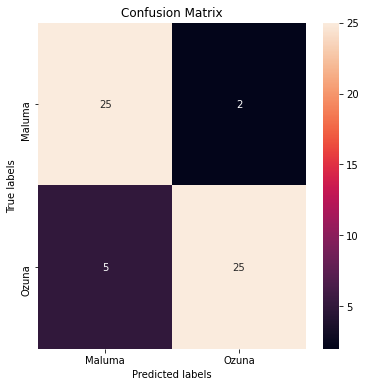

In [346]:
m.fit(Xtrain_rus,ytrain_rus)
ypred_test_m_rus = m.predict(Xtest)
print_evaluations(ytest, ypred_test_m_rus, m)
f' train: {m.score(Xtrain_rus,ytrain_rus)}, test: {m.score(Xtest,ytest)}'

### SMOTE

In [ ]:
m.fit(Xtrain_smote,ytrain_smote)
ypred_test_m_smote = m.predict(Xtest)
print_evaluations(ytest, ypred_test_m_smote, m)
f' train: {m.score(Xtrain_smote,ytrain_smote)}, test: {m.score(Xtest,ytest)}'

### Random Over Sampling

In [ ]:
m.fit(Xtrain_ros,ytrain_ros)
ypred_test_m_ros = m.predict(Xtest)
print_evaluations(ytest, ypred_test_m_ros, m)
f' train: {m.score(Xtrain_ros,ytrain_ros)}, test: {m.score(Xtest,ytest)}'

### Overview over the different methods to reduce class imbalance

In [ ]:
overview = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1-score'])
overview['Logistic Regression'] = get_scores(ytest, ypred_test_m)
overview['Near Miss'] = get_scores(ytest, ypred_test_m_nm)
overview['Random Under Sampling'] = get_scores(ytest, ypred_test_m_rus)
overview['SMOTE'] = get_scores(ytest, ypred_test_m_smote)
overview['Random Over Sampling'] = get_scores(ytest, ypred_test_m_ros)
overview

### Cross validaition

In [ ]:
cross_validation = cross_val_score(estimator=m, # the model to evaluate
                                     X=Xtrain,
                                     y=ytrain,
                                     scoring='f1', # evaluation metrics
                                     cv=10,
                                     verbose=3) # cross validation splitting

print(f'Validation f1 scores: {np.round(cross_validation,2)}')
print(f'\nmean: {cross_validation.mean():.2}')
print(f'std: {cross_validation.std():.1}')

### Try out Logistic Regression Model

In [347]:
new_docs_Maluma = ["Maluma Colombia Bogota Hawaí "]
new_docs_Ozuna = ["Ozuna oso puerto rico negrito"] 


In [348]:
def who_is_the_artist(new_lyrics, modeltype):
    """ This function calculates the probable artist and the corresponding probability from a list of strings or lyrics
    
    Parameters:
    -----------------
    List of strings/lyrics
    Type of the regression model (m,rf...)
    
    Returns: 
    -----------------
    [None] Prediction of the artist and probability
    """
    #first: CountVectorizer
    new_doc_vect = cv.transform(new_lyrics).todense() # <-- use only transform
    # second: TfidfTransformer
    new_doc_tfidf = tfidf.transform(new_doc_vect).todense() # <-- use only transform

    artist_number = modeltype.predict(new_doc_tfidf)
    proba = modeltype.predict_proba(new_doc_tfidf).max()
    if artist_number ==0:
        print(f'The given lyrics belong to "Maluma" to {round(proba*100,2)} percent')
    else:
        print(f'The given lyrics belong to "Ozuna" to {round(proba*100,2)} percent')

In [355]:
new_docs_Maluma = ["Maluma"]
who_is_the_artist(new_docs_Maluma, m)

The given lyrics belong to "Maluma" to 74.64 percent


In [356]:
new_docs_Ozuna = ["Ozuna"]
who_is_the_artist(new_docs_Ozuna, m)

The given lyrics belong to "Ozuna" to 63.31 percent


### Train model with Multinominal Naive Bayes

In [255]:
mnb = MultinomialNB(alpha=.01)
mnb.fit(Xtrain,ytrain)

MultinomialNB(alpha=0.01)

How does model MultinomialNB(alpha=0.01) score:
The accuracy of the model is: 0.877
The precision of the model is: 0.871
The recall of the model is: 0.9
The f1-score of the model is: 0.885
[[23  4]
 [ 3 27]]


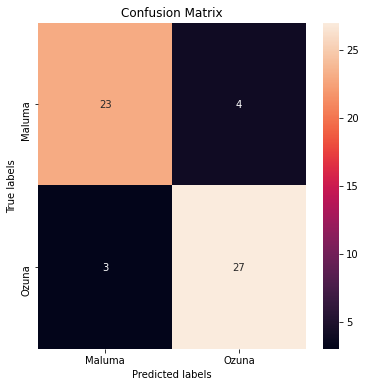

In [256]:
ypred_test_mnb = mnb.predict(Xtest)
print_evaluations(ytest, ypred_test_mnb, mnb)

### Train model with Random Forest

In [96]:
# instantiate the model
rf = RandomForestClassifier(n_estimators=80, max_depth=5, random_state=14)
# fit the model 
rf.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=5, n_estimators=80, random_state=14)

In [97]:
# evaluate the model
print(f'The accuracy of the RF on on the train data is {rf.score(Xtrain,ytrain):.3f}')
print(f'\n' f'The accuracy of the RF on on the test data is {rf.score(Xtest,ytest):.3f}')

The accuracy of the RF on on the train data is 0.943

The accuracy of the RF on on the test data is 0.930


How does model RandomForestClassifier(max_depth=5, n_estimators=80, random_state=14) score:
The accuracy of the model is: 0.982
The precision of the model is: 1.0
The recall of the model is: 0.967
The f1-score of the model is: 0.983
[[27  0]
 [ 1 29]]


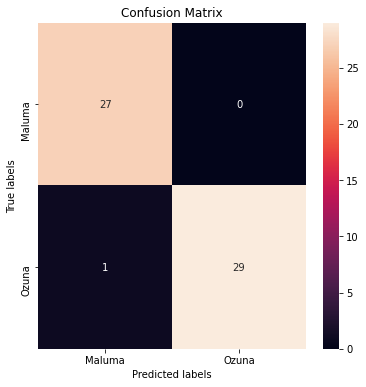

In [257]:
ypred_test_rf = rf.predict(Xtest)
print_evaluations(ytest, ypred_test_rf, rf)

### Try out Logistic random forest

In [167]:
who_is_the_artist(new_docs_Maluma, rf)

The given lyrics belong to "Maluma" to 68.75 percent


In [168]:
who_is_the_artist(new_docs_Ozuna, rf)

The given lyrics belong to "Maluma" to 52.47 percent


# Overview over all applied models

In [258]:
overview['Naive Bayes'] = get_scores(ytest, ypred_test_mnb)
overview['Random Forest'] = get_scores(ytest, ypred_test_rf)
overview

,Logistic Regression,Near Miss,Random Under Sampling,SMOTE,Random Over Sampling,Naive Bayes,Random Forest
accuracy,0.877,0.842,0.877,0.842,0.877,0.877,0.982
precision,0.897,0.920,0.926,0.889,0.926,0.871,1.000
recall,0.867,0.767,0.833,0.800,0.833,0.900,0.967
f1-score,0.881,0.836,0.877,0.842,0.877,0.885,0.983


# Word Cloud

In [259]:
docs_word_maluma = []
count = range(len(song_names))
for i in count:
    
    filepath = 'Maluma/{}'.format(song_names[i])
    filename = filepath+'/{}.txt'.format(song_names[i])
    song_file = open(filename, "r")
    lyrics= song_file.read()
    docs_word_maluma.append(lyrics)

In [263]:
cleaned_doc_word_maluma = []

for line in docs_word_maluma: 
    line_lower = line.lower()
    line_clean = re.sub("[^\w\s]", "", line_lower)
    cleaned_doc_word_maluma.append(line_clean) 


In [272]:
vectorized_corpus_maluma = cv.fit_transform(cleaned_doc_word_maluma)
tfidf_matr_maluma=tfidf.fit_transform(vectorized_corpus_maluma)
idf_df = pd.DataFrame(tfidf.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
df_maluma = idf_df.sort_values(by=['idf_weights'])

In [296]:
maluma_list[:50]

array(['baby', 'si', 'maluma', 'pa', 'solo', 'quiero', 'sé', 'amor',
       'cuerpo', 'así', 'siempre', 'bien', 'boy', 'yeah', 'cómo', 'mami',
       'noche', 'conmigo', 'oh', 'aquí', 'dice', 'va', 'vas', 'pretty',
       'dime', 'día', 'corazón', 'nunca', 'voy', 'quieres', 'ser',
       'alright', 'you', 'mejor', 'ay', 'sabes', 'hoy', 'nadie', 'dirty',
       'loco', 'ahora', 'jaja', 'gusta', 'vida', 'vez', 'aunque', 'to',
       'ver', 'ven', 'vamos'], dtype=object)

In [280]:
maluma_list = df_maluma.index.values
wordcloud_maluma = ' '.join(maluma_list[:50])

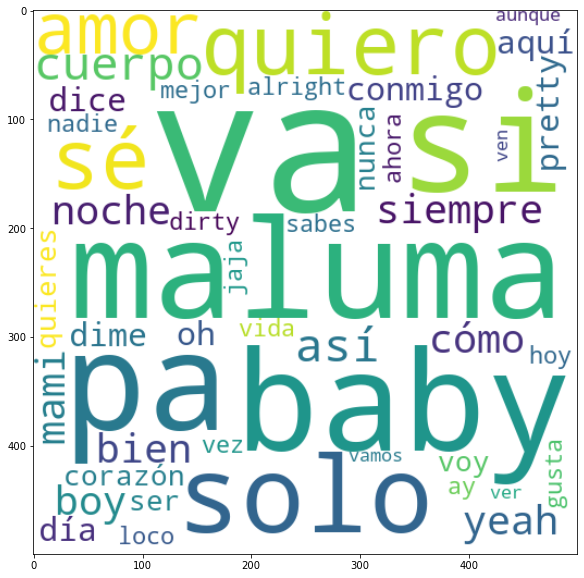

In [310]:
mask = np.zeros((500, 500, 3), np.uint8)

mask[150:350,150:350,:] = 0  # masked out area
cloud = wordcloud.WordCloud(background_color="white",
                max_words=50,
                mask=mask,
                collocations= False,  # calculates frequencies
                contour_color='steelblue').generate(wordcloud_maluma)
                # stop words are removed!

plt.figure(figsize = (10,10))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('cloud_maluma.png')
plt.show()

In [289]:
docs_word_ozuna = []
count_rosa = range(len(song_names_rosa))
for i in count_rosa:
    
    filepath = 'Ozuna/{}'.format(song_names_rosa[i])
    filename = filepath+'/{}.txt'.format(song_names_rosa[i])
    song_file = open(filename, "r")
    lyrics= song_file.read()
    docs_word_ozuna.append(lyrics)

In [290]:
cleaned_doc_word_ozuna = []

for line in docs_word_ozuna: 
    line_lower = line.lower()
    line_clean = re.sub("[^\w\s]", "", line_lower)
    cleaned_doc_word_ozuna.append(line_clean) 


In [292]:
vectorized_corpus_ozuna = cv.fit_transform(cleaned_doc_word_ozuna)
tfidf_matr_ozuna=tfidf.fit_transform(vectorized_corpus_ozuna)
idf_df = pd.DataFrame(tfidf.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
df_ozuna = idf_df.sort_values(by=['idf_weights'])

In [293]:
ozuna_list = df_ozuna.index.values
wordcloud_ozuna = ' '.join(ozuna_list[:50])

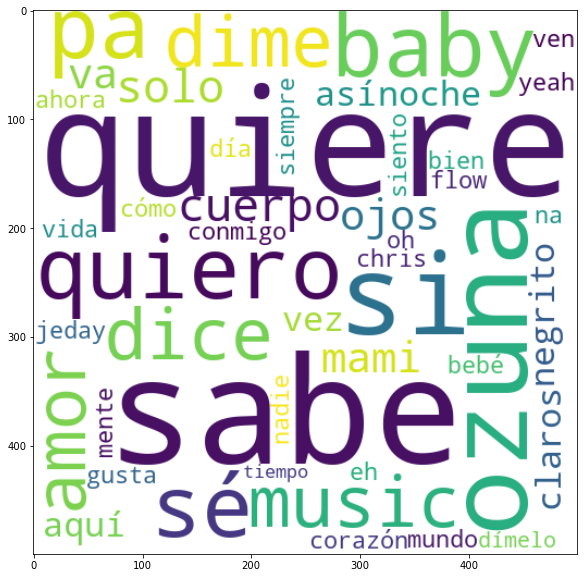

In [311]:
mask = np.zeros((500, 500, 3), np.uint8)

mask[150:350,150:350,:] = 0  # masked out area
cloud = wordcloud.WordCloud(background_color="white",
                max_words=50,
                mask=mask,
                collocations= False,  # calculates frequencies
                contour_color='steelblue').generate(wordcloud_ozuna)
                # stop words are removed!

plt.figure(figsize = (10,10))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('cloud_ozuna.png')
plt.show()